1.13.0


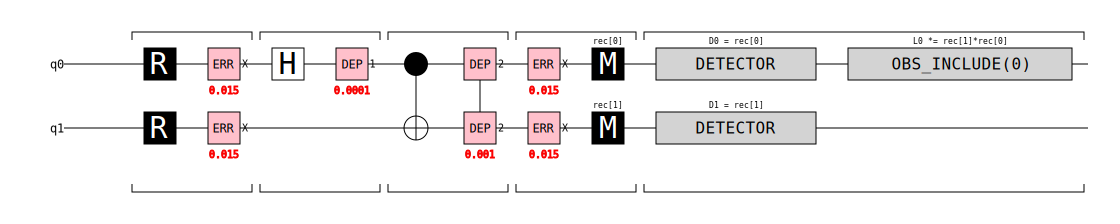

In [1]:
import stim
print(stim.__version__)

circuit = stim.Circuit("""
    TICK
    R 0 1
    X_ERROR(0.015) 0 
    X_ERROR(0.015) 1
    TICK
    
    H 0
    DEPOLARIZE1(0.0001) 0
    
    TICK
    CX 0 1
    DEPOLARIZE2(0.001) 0 1
    
    TICK

    X_ERROR(0.015) 0 
    X_ERROR(0.015) 1
    M 0 1
    TICK
    DETECTOR rec[-2]
    DETECTOR rec[-1]
    OBSERVABLE_INCLUDE(0) rec[-1] rec[-2] 
""")

circuit.diagram('timeline-svg')

In [2]:
circuit.detector_error_model(allow_gauge_detectors=True)

stim.DetectorErrorModel('''
    error(0.5) D0 D1
    error(0.0152587) D0 L0
    error(0.029801) D1 L0
''')

In [5]:
print(circuit.explain_detector_error_model_errors()[1])

ExplainedError {
    dem_error_terms: D0 L0
    CircuitErrorLocation {
        flipped_pauli_product: X0
        Circuit location stack trace:
            (after 4 TICKs)
            at instruction #11 (X_ERROR) in the circuit
            at target #1 of the instruction
            resolving to X_ERROR(0.015) 0
    }
    CircuitErrorLocation {
        flipped_pauli_product: X0
        Circuit location stack trace:
            (after 3 TICKs)
            at instruction #9 (DEPOLARIZE2) in the circuit
            at targets #1 to #2 of the instruction
            resolving to DEPOLARIZE2(0.001) 0 1
    }
    CircuitErrorLocation {
        flipped_pauli_product: X0*Z1
        Circuit location stack trace:
            (after 3 TICKs)
            at instruction #9 (DEPOLARIZE2) in the circuit
            at targets #1 to #2 of the instruction
            resolving to DEPOLARIZE2(0.001) 0 1
    }
    CircuitErrorLocation {
        flipped_pauli_product: Y0
        Circuit location stack trac

In [14]:
0.014775+0.007275

0.02205

# 实验一

1.13.0


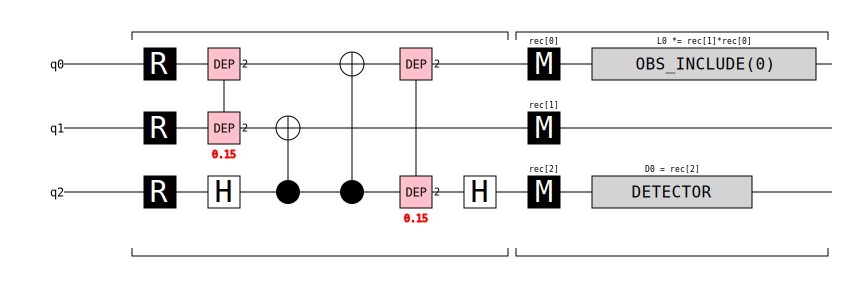

In [95]:
import stim
print(stim.__version__)

circuit = stim.Circuit("""
    TICK
    R 0 1 2
    
    DEPOLARIZE2(0.15) 0 1
    H 2
    CX 2 1
    CX 2 0 
    DEPOLARIZE2(0.15) 2 0
    H 2
    TICK

    M 0 1 2
    
    DETECTOR rec[-1]
    OBSERVABLE_INCLUDE(0) rec[-2] rec[-3] 
""")

circuit.diagram('timeline-svg')

In [96]:
dem = circuit.detector_error_model(approximate_disjoint_errors=True,allow_gauge_detectors=True)

print(repr(dem))


stim.DetectorErrorModel('''
    error(0.5) D0
    error(0.08) D0 L0
    error(0.08) L0
''')


In [99]:
shots = 1000000

sampler = circuit.compile_detector_sampler()
syndrome, actual_observables = sampler.sample(shots=shots, separate_observables=True)

print(f"syndrome.shape:{syndrome.shape}, actual_observables.shape:{actual_observables.shape}")

count_00 = 0
count_01 = 0
count_10 = 0
count_11 = 0
for i in range(shots):
    if syndrome[i] == False and actual_observables[i] == False:
        count_00 += 1
    elif syndrome[i] == False and actual_observables[i] == True:
        count_01 += 1
    elif syndrome[i] == True and actual_observables[i] == False:
        count_10 += 1
    elif syndrome[i] == True and actual_observables[i] == True:
        count_11 += 1
print(f"count_00:{count_00/shots}, count_01:{count_01/shots}, count_10:{count_10/shots}, count_11:{count_11/shots}")

syndrome.shape:(1000000, 1), actual_observables.shape:(1000000, 1)
count_00:0.42587, count_01:0.073112, count_10:0.427262, count_11:0.073756


In [98]:
0.46*0.88+0.04*0.04+0.46*0.04+0.04*0.04

0.42639999999999995

In [89]:
dem = circuit.detector_error_model()

print(repr(dem))

ValueError: The circuit contains non-deterministic detectors.
(To allow non-deterministic detectors, use the `allow_gauge_detectors` option.)

This was discovered while analyzing a Z-basis reset (R) on:
    qubit 1

The collapse anti-commuted with these detectors/observables:
    D0

The backward-propagating error sensitivity for D0 was:
    X0
    X1

Circuit stack trace:
    during TICK layer #2 of 3
    at instruction #2 [which is R 0 1 2]

In [25]:
dem = circuit.detector_error_model(decompose_errors=True)

print(repr(dem))

ValueError: The circuit contains non-deterministic detectors.
(To allow non-deterministic detectors, use the `allow_gauge_detectors` option.)

This was discovered while analyzing qubit initialization into |0> at the start of the circuit on:
    qubit 1

The collapse anti-commuted with these detectors/observables:
    D2

The backward-propagating error sensitivity for D2 was:
    X1
    Z2

In [105]:
circuit = stim.Circuit("""
    TICK
    DEPOLARIZE2(0.15) 0 1
    TICK

    X_ERROR(0.7) 2
    M 0 1 2
    
    DETECTOR rec[-3] 
    DETECTOR rec[-2] 
    DETECTOR rec[-1]
""")
dem = circuit.detector_error_model(allow_gauge_detectors=True)

print(repr(dem))

shots = 1000000

sampler = circuit.compile_detector_sampler()
results = sampler.sample(shots=shots, append_observables=True)
print(results)

stim.DetectorErrorModel('''
    error(0.0417424) D0
    error(0.0417424) D0 D1
    error(0.0417424) D1
    error(0.7) D2
''')
[[False False False]
 [False False  True]
 [False False  True]
 ...
 [ True  True  True]
 [False False  True]
 [False False  True]]


In [1]:
import stim
print(stim.__version__)

circuit = stim.Circuit("""
    TICK
    CORRELATED_ERROR(0.15) X0 X1
    TICK

    M 0 1
    
    DETECTOR rec[-2] 
    DETECTOR rec[-1] 
""")

dem = circuit.detector_error_model()
print(repr(dem))

1.13.0
stim.DetectorErrorModel('''
    error(0.15) D0 D1
''')


In [106]:
819/50000

0.01638

# 实验二

1.13.0


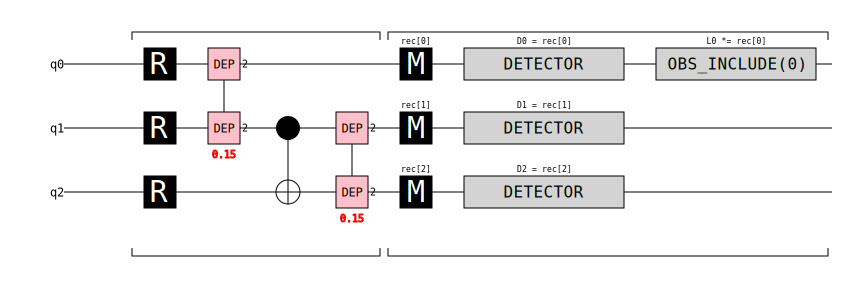

In [20]:
import stim
print(stim.__version__)

circuit = stim.Circuit("""
    TICK
    R 0 1 2
    DEPOLARIZE2(0.15) 0 1
    CX 1 2
    DEPOLARIZE2(0.15) 1 2
    # CX 0 2 
    # DEPOLARIZE2(0.15) 0 2
    TICK


    M 0 1 2
    DETECTOR rec[-3]
    DETECTOR rec[-2]
    DETECTOR rec[-1]
    OBSERVABLE_INCLUDE(0) rec[-3] 
""")

circuit.diagram('timeline-svg')

In [21]:
dem = circuit.detector_error_model(decompose_errors=True)

print(repr(dem))

stim.DetectorErrorModel('''
    error(0.0417424) D0 L0
    error(0.0417424) D1
    error(0.0417424) D1 D2
    error(0.0417424) D1 D2 ^ D0 L0
    error(0.0417424) D1 ^ D2
    error(0.0417424) D2
''')


In [22]:
dem = circuit.detector_error_model()

print(repr(dem))

stim.DetectorErrorModel('''
    error(0.0417424) D0 D1 D2 L0
    error(0.0417424) D0 L0
    error(0.0417424) D1
    error(0.08) D1 D2
    error(0.0417424) D2
''')


: 